In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import FinanceDataReader as fdr

In [4]:
import koreanize_matplotlib

In [5]:
import datetime
from dateutil.relativedelta import relativedelta

In [6]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', None) #None으로 설정하면 모든 행 출력

In [7]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime
# 오늘 날짜 구하기
today = datetime.datetime.today()
today_str = today.strftime('%Y-%m-%d')


In [8]:
# n개월 전 날짜 계산 함수(개월단위위)
def calculate_start_date(months_ago, end_date):
    start_date = datetime.datetime.strptime(end_date, '%Y-%m-%d') - relativedelta(months=months_ago)
    return start_date.strftime('%Y-%m-%d')

In [9]:
# 특정 종목의 수익률을 반환해주는 함수

def return_by_stock(stock, month_ago = 1, end_date=today_str):
  
  start_date = calculate_start_date(month_ago, end_date)
  
  try:
    data = fdr.DataReader(stock, start=start_date, end=end_date)[['Close']]
    data['return'] = data.pct_change()
    
    # NaN 값 처리: 첫 번째 행 삭제
    data = data.dropna()
    
    # 수익률을 퍼센트로 변환
    data['return'] = data['return'] * 100
    
    # 해당 기간 전체 수익률 계산
    total_return = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100

    # 통계 정보 추가
    average_return = data['return'].mean()
    std_dev_return = data['return'].std()
    
    # 결과 출력
    print(f"종목: {stock}, {month_ago}개월 총 수익률: {total_return:.2f}%, 평균 수익률: {average_return:.2f}%, 표준편차: {std_dev_return:.4f}")
    
    # 수익률 변화 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['return'], marker='o', linestyle='-', color='b', label='일일 수익률')
    plt.title(f'{stock}의 일일 수익률 변화')
    plt.xlabel('날짜')
    plt.ylabel('수익률 (%)')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # 수익률 0% 선 추가
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()
    
    # print(type(data))
    # display(data)
    return data
  except Exception as e:
    print(f"데이터를 가져오는 중 오류가 발생했습니다: {e}")
    return None


종목: 005930, 1개월 총 수익률: -8.46%, 평균 수익률: -0.26%, 표준편차: 1.9042


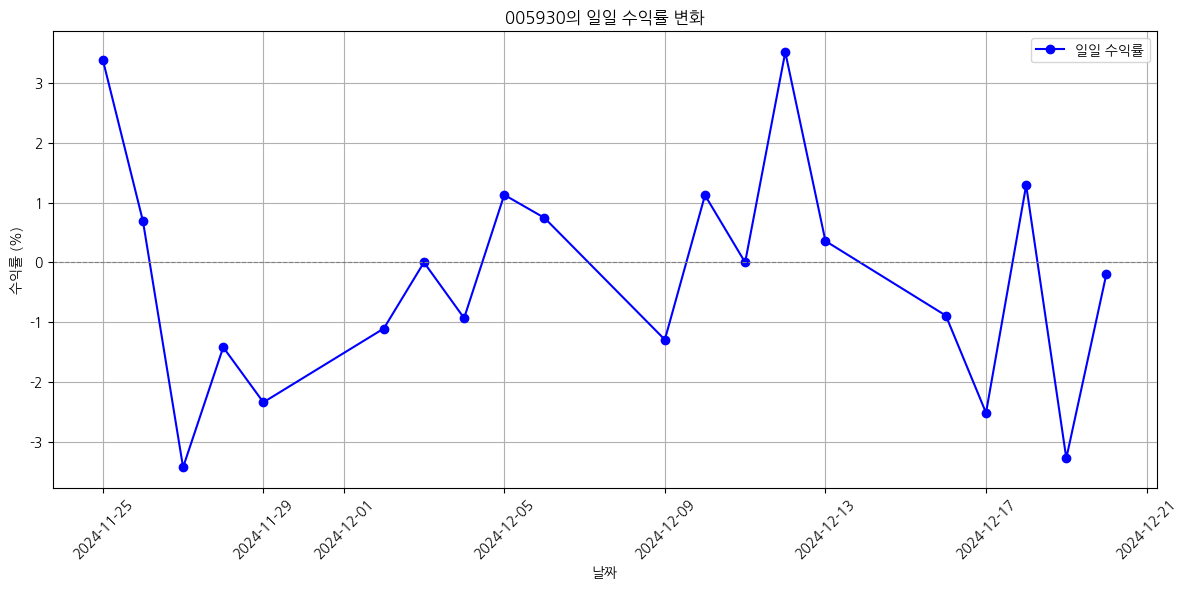

,Close,return
Date,,
2024-11-25,57900,3.392857
2024-11-26,58300,0.690846
2024-11-27,56300,-3.430532
2024-11-28,55500,-1.420959
2024-11-29,54200,-2.342342
2024-12-02,53600,-1.107011
2024-12-03,53600,0.000000
2024-12-04,53100,-0.932836
2024-12-05,53700,1.129944


In [11]:
return_by_stock('005930')